<a href="https://colab.research.google.com/github/AdithyaaVenkatesh/Oasis_intern/blob/main/Task_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **PROJECT 4 - LEVEL 1**


---
# **Sentiment Analysis**


## 1) Data cleaning and preprocessing

In [ ]:
pip install pandas scikit-learn nltk seaborn matplotlib imbalanced-learn


In [ ]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import SMOTE




In [ ]:
df = pd.read_csv("/content/Twitter_Data.csv")
print(df.head())

                                          clean_text  category
0  when modi promised “minimum government maximum...      -1.0
1  talk all the nonsense and continue all the dra...       0.0
2  what did just say vote for modi  welcome bjp t...       1.0
3  asking his supporters prefix chowkidar their n...       1.0
4  answer who among these the most powerful world...       1.0


In [ ]:
print(df.isnull().sum())

clean_text    1
category      1
dtype: int64


In [ ]:
df["clean_text"] = df["clean_text"].fillna("unknown")
df["category"] = df["category"].fillna("0")
print(df.isnull().sum())

clean_text    0
category      0
dtype: int64


In [ ]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    text = text.lower()

    text = re.sub(r'[^a-z\s]', '', text)

    text = re.sub(r"\bnot good\b", "bad", text)
    text = re.sub(r"\bnot bad\b", "good", text)
    text = re.sub(r"\bnot happy\b", "sad", text)

    tokens = word_tokenize(text)

    tokens = [word for word in tokens if word not in stop_words]

    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    return ' '.join(tokens)

df["clean_text"] = df["clean_text"].apply(preprocess_text)
print(df.head())

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


                                          clean_text category
0  modi promised minimum government maximum gover...     -1.0
1             talk nonsense continue drama vote modi      0.0
2  say vote modi welcome bjp told rahul main camp...      1.0
3  asking supporter prefix chowkidar name modi gr...      1.0
4  answer among powerful world leader today trump...      1.0


## 2) train dataset

In [ ]:

df['category'] = pd.to_numeric(df['category'], errors='coerce')  N
df['category'] = df['category'].fillna(0).astype(int)

# Now proceed with train-test split and SMOTE
X_train, X_test, y_train, y_test = train_test_split(df["clean_text"], df["category"], test_size=0.2, random_state=42)

vectorizer = TfidfVectorizer(ngram_range=(1, 2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

smote = SMOTE(random_state=42)
X_train_vec, y_train = smote.fit_resample(X_train_vec, y_train)

In [ ]:
svm_model = SVC(kernel="linear")  # Linear Kernel is best for text classification
svm_model.fit(X_train_vec, y_train)


SVC(kernel='linear')

In [ ]:
print(f"X_train_vec shape: {X_train_vec.shape}")  # Should match y_train
print(f"y_train shape: {y_train.shape}")  # Should match X_train_vec


X_train_vec shape: (15951, 140499)
y_train shape: (15951,)


In [ ]:
svm_model = SVC(kernel="linear")  # Linear Kernel is best for text classification
svm_model.fit(X_train_vec, y_train)
y_pred = svm_model.predict(X_test_vec)

# Accuracy and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7930391547545059
              precision    recall  f1-score   support

          -1       0.73      0.74      0.74       730
           0       0.84      0.77      0.80      1130
           1       0.79      0.84      0.81      1358

    accuracy                           0.79      3218
   macro avg       0.79      0.78      0.79      3218
weighted avg       0.79      0.79      0.79      3218



## 3)Data visualization

<ipython-input-21-35031a17ce6b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="category", palette="coolwarm")


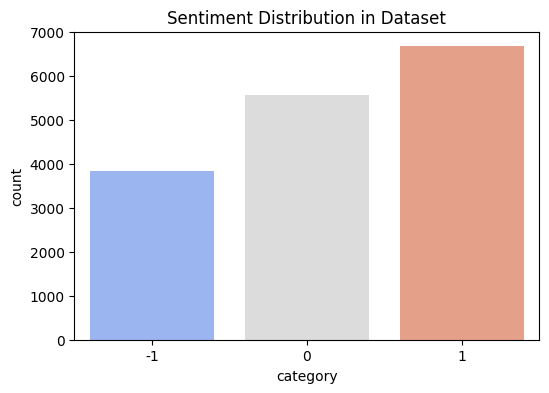

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="category", palette="coolwarm")
plt.title("Sentiment Distribution in Dataset")
plt.show()


In [ ]:
new_texts = ["I really love this!", "This was a bad experience.", "great."]
new_texts_clean = [preprocess_text(text) for text in new_texts]

new_texts_vec = vectorizer.transform(new_texts_clean)

predictions = svm_model.predict(new_texts_vec)

label_map = {-1: "Negative", 0: "Neutral", 1: "Positive"}
for text, sentiment in zip(new_texts, predictions):
    print(f"Text: {text} -> Sentiment: {label_map[sentiment]}")


Text: I really love this! -> Sentiment: Positive
Text: This was a bad experience. -> Sentiment: Negative
Text: great. -> Sentiment: Positive
